# Load data

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data
try:
    news_df = pd.read_csv('../data/raw_analyst_ratings.csv')
    print(news_df.head())
except FileNotFoundError:
    print("Ensure your data files are correctly placed.")

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

# Initial Data Cleaning and Preparation

--- 📰 News Data Loaded Successfully ---

First 5 Rows of the News Data:
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00   

/tmp/ipykernel_44271/1411645834.py:18: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  news_df[date_column_name] = pd.to_datetime(news_df[date_column_name], format='mixed', utc=True, infer_datetime_format=True)



--- 🧹 Cleaning Complete. New Data Structure ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   headline          1407328 non-null  object        
 1   url               1407328 non-null  object        
 2   publisher         1407328 non-null  object        
 3   date              1407328 non-null  datetime64[ns]
 4   stock             1407328 non-null  object        
 5   publication_date  1407328 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 64.4+ MB

--- 📈 Headline Length Statistics ---
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


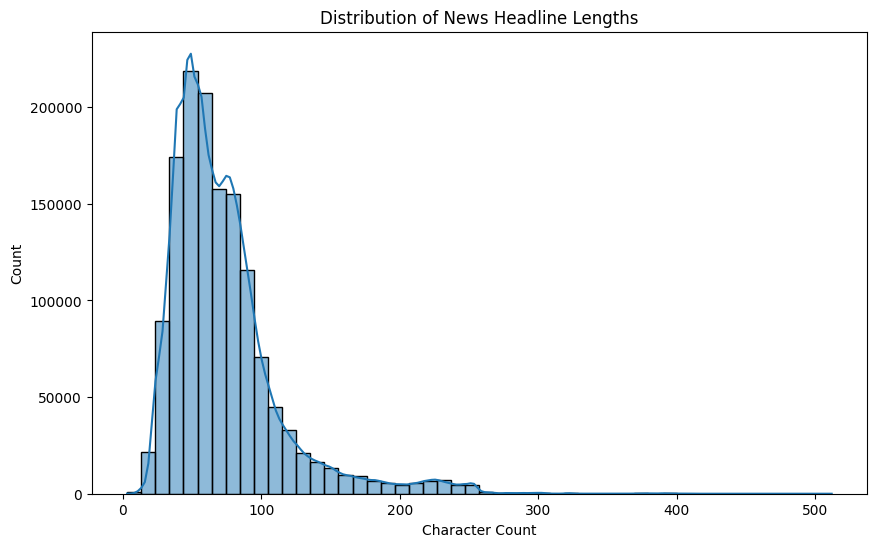


--- 📰 Top 10 News Publishers ---
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


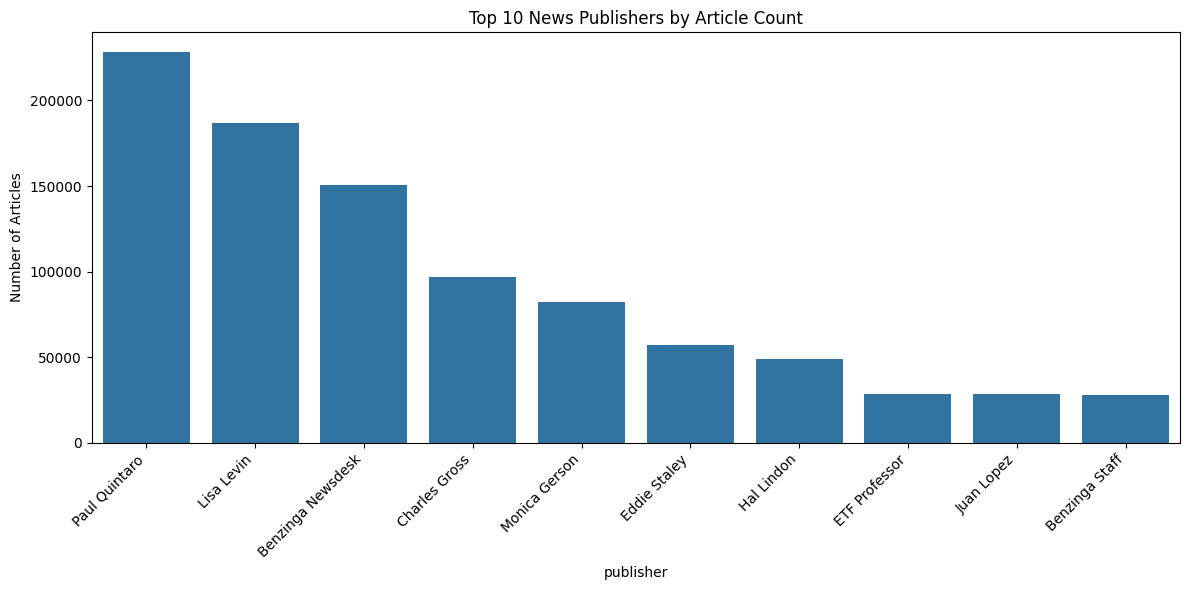

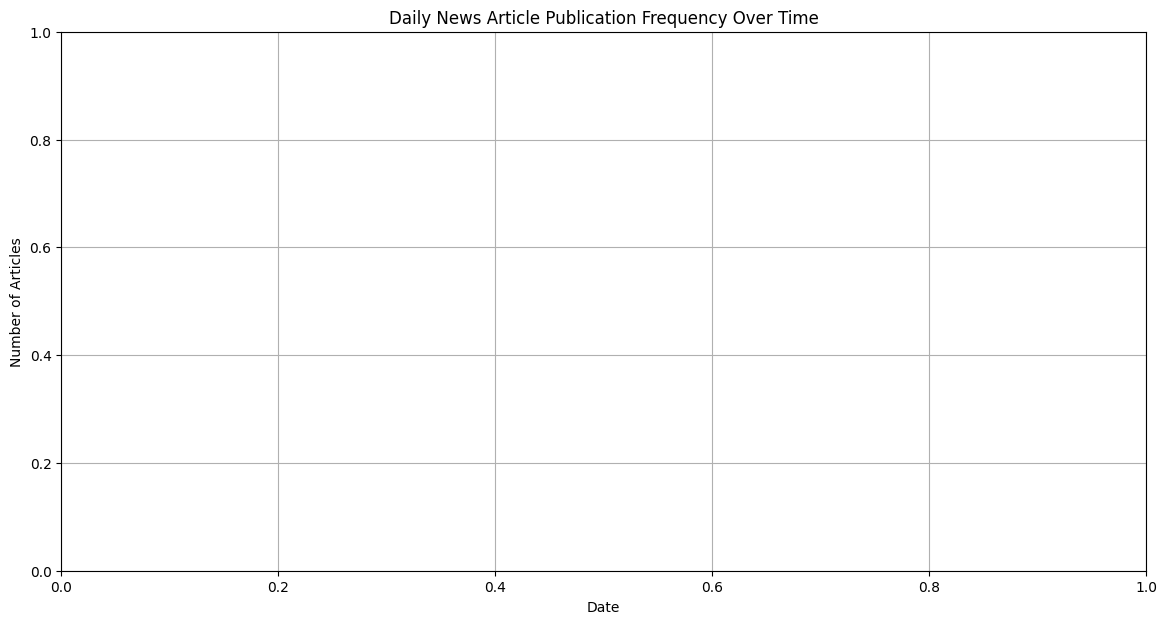

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/home/rahel/nltk_data'
    - '/home/rahel/Desktop/Predicting Price Moves with News Sentiment/venv/nltk_data'
    - '/home/rahel/Desktop/Predicting Price Moves with News Sentiment/venv/share/nltk_data'
    - '/home/rahel/Desktop/Predicting Price Moves with News Sentiment/venv/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [16]:
import numpy as np
from collections import Counter
from nltk.corpus import stopwords
import re

try:
    news_df = pd.read_csv('../data/raw_analyst_ratings.csv')
    
    print("--- 📰 News Data Loaded Successfully ---")
    print("\nFirst 5 Rows of the News Data:")
    print(news_df.head())
    
    # 1. Drop Unnecessary Column
    news_df = news_df.drop(columns=['Unnamed: 0'])

    # 2. Date Conversion (Handling mixed formats)
    date_column_name = 'date' 
    news_df[date_column_name] = pd.to_datetime(news_df[date_column_name], format='mixed', utc=True, infer_datetime_format=True)
    news_df[date_column_name] = news_df[date_column_name].dt.tz_localize(None)

    # 3. Create publication_date for daily aggregation
    news_df['publication_date'] = news_df[date_column_name].dt.date
    
    print("\n--- 🧹 Cleaning Complete. New Data Structure ---")
    news_df.info()

    # --- EDA: HEADLINE LENGTH ---
    news_df['headline_length'] = news_df['headline'].apply(len)
    
    print("\n--- 📈 Headline Length Statistics ---")
    print(news_df['headline_length'].describe())

    plt.figure(figsize=(10, 6))
    sns.histplot(news_df['headline_length'], bins=50, kde=True)
    plt.title('Distribution of News Headline Lengths')
    plt.xlabel('Character Count')
    plt.show()
    

    # --- EDA: PUBLISHER ANALYSIS ---
    publisher_counts = news_df['publisher'].value_counts().head(10)

    print("\n--- 📰 Top 10 News Publishers ---")
    print(publisher_counts)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=publisher_counts.index, y=publisher_counts.values)
    plt.title('Top 10 News Publishers by Article Count')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Number of Articles')
    plt.tight_layout()
    plt.show()
    

    # --- EDA: TIME SERIES PUBLICATION FREQUENCY ---
    temp_df = news_df.set_index('publication_date')
    # daily_counts = news_df.set_index('publication_date').resample('D').size()

    plt.figure(figsize=(14, 7))
    # daily_counts.plot()
    plt.title('Daily News Article Publication Frequency Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Articles')
    plt.grid(True)
    plt.show()
    

    # --- EDA: TOPIC MODELING / KEYWORDS ---
    stop_words = set(stopwords.words('english'))

    def get_top_words(text_series, n=20):
        all_words = []
        for headline in text_series:
            text = re.sub(r'[^\w\s]', '', str(headline).lower())
            words = [word for word in text.split() if word not in stop_words and len(word) > 2]
            all_words.extend(words)
        return Counter(all_words).most_common(n)

    top_keywords = get_top_words(news_df['headline'])

    print("\n--- 💡 Top 20 Keywords (Excluding Stop Words) ---")
    print(top_keywords)

except FileNotFoundError:
    print("Error: News data file not found. Check the path.")